# Hexagonal Grid Generation Using Oscillatory Interference

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Interactive display
import ipywidgets as widgets

Consider an area of the 2-dimensional plane:

In [2]:
delta = 0.01
x_min, x_max = -5, 5
y_min, y_max = -5, 5

x = np.arange(x_min, x_max, delta)
y = np.arange(y_min, y_max, delta)

The [`np.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) function generates the coordinate matrices for the 2D grid:

In [3]:
X, Y = np.meshgrid(x, y)
print('X:')
print(X)
print('Y:')
print(Y)

X:
[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
Y:
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


Consider a system of three 2-dimesional oscillators with directions varying by $30\degree$:

$$
\begin{cases}
    f_1\left(x, y\right) = \cos\left(2 \pi x\right) \\
    f_2\left(x, y\right) = \cos\left(2 \pi \left(\cos\left(\frac{\pi}{3}\right) x + \sin\left(\frac{\pi}{3}\right) y\right)\right) \\
    f_3\left(x, y\right) = \cos\left(2 \pi \left(\cos\left(-\frac{\pi}{3}\right) x + \sin\left(-\frac{\pi}{3}\right) y\right)\right)
\end{cases}
$$

Note that we multiply arguments by $2\pi$ so the period of oscillation is equal to $1$.

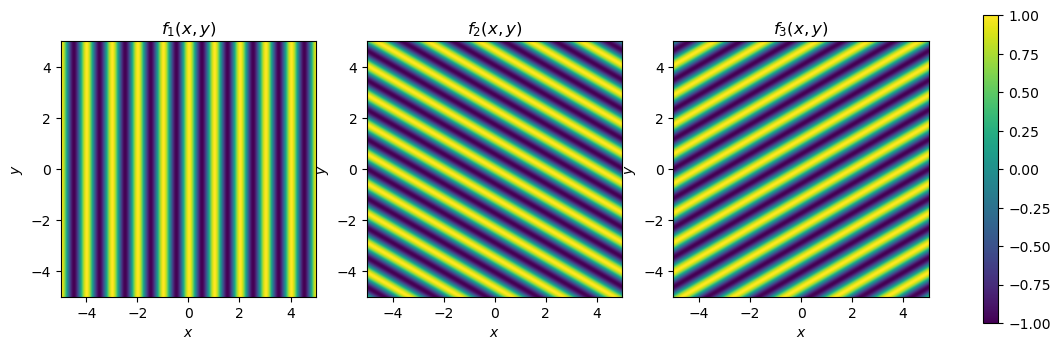

In [4]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 4))

axes[0].imshow(np.cos(2 * np.pi * X), origin="lower", extent=[x_min, x_max, y_min, y_max])
axes[0].set_title(r"$f_1\left(x, y\right)$")
axes[0].set_xlabel(r"$x$")
axes[0].set_ylabel(r"$y$")

im = axes[1].imshow(np.cos(2 * np.pi * (np.cos(np.pi/3) * X + np.sin(np.pi/3) * Y)), origin="lower", extent=[x_min, x_max, y_min, y_max])
axes[1].set_title(r"$f_2\left(x, y\right)$")
axes[1].set_xlabel(r"$x$")
axes[1].set_ylabel(r"$y$")

im = axes[2].imshow(np.cos(2 * np.pi * (np.cos(-np.pi/3) * X + np.sin(-np.pi/3) * Y)), origin="lower", extent=[x_min, x_max, y_min, y_max])
axes[2].set_title(r"$f_3\left(x, y\right)$")
axes[2].set_xlabel(r"$x$")
axes[2].set_ylabel(r"$y$")

cbar = fig.colorbar(im, ax=axes.ravel().tolist())

plt.show()

By the interference of these oscillators we'll get a hexagonal grid pattern:

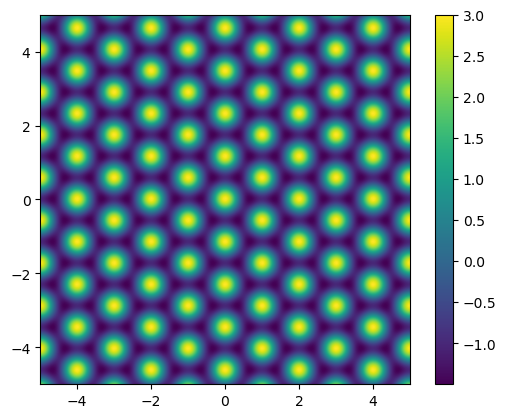

In [5]:
plt.imshow(
    np.cos(2 * np.pi * X) + \
    np.cos(2 * np.pi * (np.cos(np.pi/3) * X + np.sin(np.pi/3) * Y)) +\
    np.cos(2 * np.pi * (np.cos(-np.pi/3) * X + np.sin(-np.pi/3) * Y)), origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.colorbar();

Note that minimum value on the grid is not $-3$, but $-1.5$.

**TODO:** We may solve this analytically. See [this](https://www.wolframalpha.com/input?i=min%28cos%28x%29+%2B+cos%28cos%28pi%2F3%29+*+x+%2B+sin%28pi%2F3%29+*+y%29+%2B+cos%28cos%28pi%2F3%29+*+x+%2B+sin%28-pi%2F3%29+*+y%29%29).

Let's implement the function for generation of a hexagonal grid with specified shift, scaling and rotation (and normalized output value):

In [6]:
def HexagonalGrid(X, Y, *, x_shift=0, y_shift=0, x_scaling=1, y_scaling=1, rotation=0):
    f_1 = np.cos(2 * np.pi * (x_scaling * (X - x_shift) * np.cos(rotation) + y_scaling * (Y - y_shift) * np.sin(rotation)))
    f_2 = np.cos(2 * np.pi * (x_scaling * (X - x_shift) * np.cos(rotation + np.pi/3) + y_scaling * (Y - y_shift) * np.sin(rotation + np.pi/3)))
    f_3 = np.cos(2 * np.pi * (x_scaling * (X - x_shift) * np.cos(rotation - np.pi/3) + y_scaling * (Y - y_shift) * np.sin(rotation - np.pi/3)))
    return (f_1 + f_2 + f_3 + 1.5) / 4.5

The grid with default parameters can be easily reproduced. Note though that the values are scaled to the range $\left[0,1\right]$:

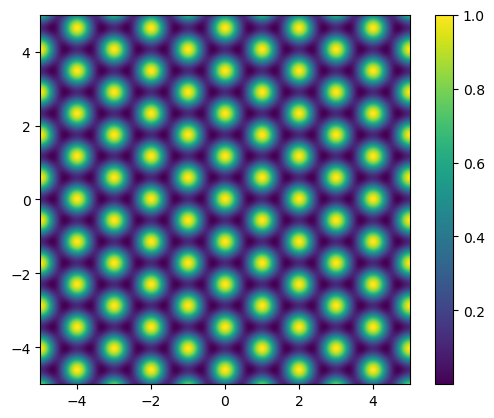

In [7]:
grid = HexagonalGrid(X, Y)

plt.imshow(grid, origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.colorbar();

Let's look at how the rotation angle affects the grid. Here's rotation to $15\degree$ ($\dfrac{\pi}{12}$ radians):

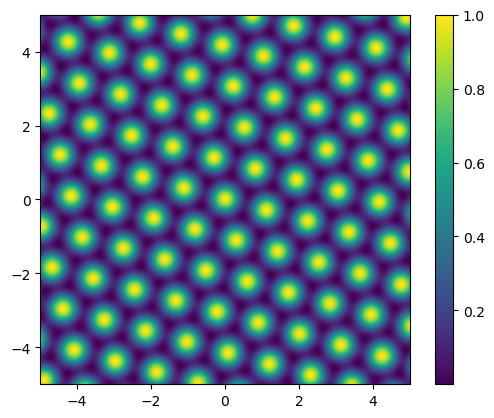

In [8]:
grid = HexagonalGrid(X, Y, rotation=np.pi/12)

plt.imshow(grid, origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.colorbar();

Note that rotation to $30\degree$ ($\dfrac{\pi}{6}$ radians) produces the same grid as no rotation. So we may limit possible rotations to the range of $\left[0, \dfrac{\pi}{6}\right)$ radians.

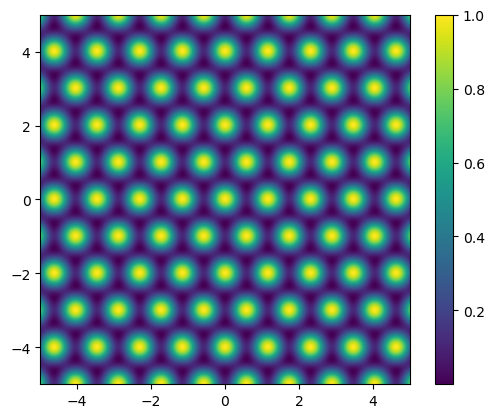

In [9]:
grid = HexagonalGrid(X, Y, rotation=np.pi/6)

plt.imshow(grid, origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.colorbar();

Let's play a bit with other parameters:

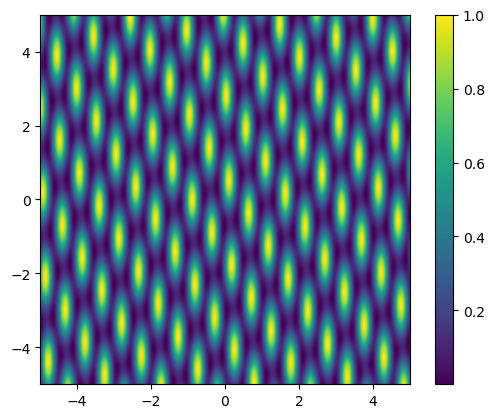

In [10]:
grid = HexagonalGrid(X, Y, x_shift=0.1, y_shift=0.5, x_scaling=2, y_scaling=0.5, rotation=np.pi/24)

plt.imshow(grid, origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.colorbar();

And here's the interactive example:

In [11]:
@widgets.interact(
    x_shift=widgets.FloatSlider(0, min=-1.0, max=1.0),
    y_shift=widgets.FloatSlider(0, min=-1.0, max=1.0),
    x_scaling=widgets.FloatSlider(1, min=0.1, max=10),
    y_scaling=widgets.FloatSlider(1, min=0.1, max=10),
    rotation_degrees=widgets.FloatSlider(0, min=0, max=30)
    )
def plot_data_estimate(x_shift, y_shift, x_scaling, y_scaling, rotation_degrees):
  grid = HexagonalGrid(X, Y, x_shift=x_shift, y_shift=y_shift, x_scaling=x_scaling, y_scaling=y_scaling, rotation=rotation_degrees * np.pi / 180)
  plt.imshow(grid, origin="lower", extent=[x_min, x_max, y_min, y_max])
  plt.colorbar();

interactive(children=(FloatSlider(value=0.0, description='x_shift', max=1.0, min=-1.0), FloatSlider(value=0.0,…

A note from Francesco: We may assume that $x$ and $y$ use the same scaling factor.

**TODO:** We may prove this computationally. It seems that if we sample training data from the uniform distribution (or any symmetric bivariate distribution), the `x_scaling` and `y_scaling` parameters will be equal after the optimization.